In [2]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: xlabel='Churn', ylabel='count'>

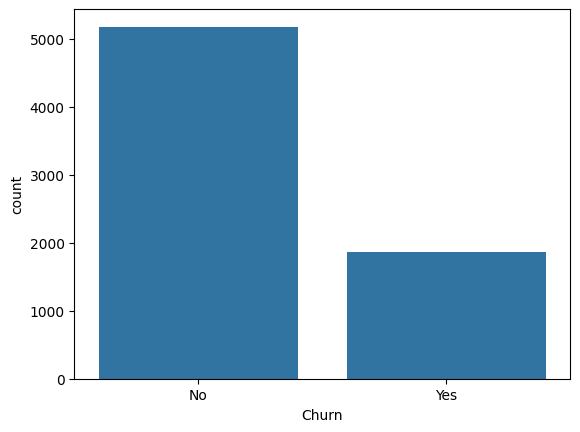

In [5]:
sns.countplot( x= 'Churn', data = df)

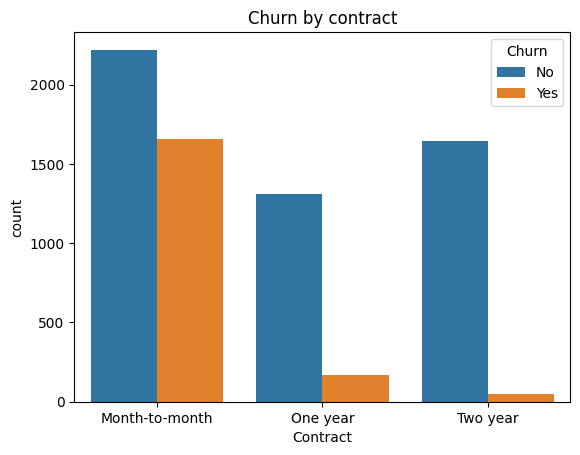

In [6]:
sns.countplot(x = 'Contract' , hue = 'Churn', data = df)
plt.title("Churn by contract")
plt.show()

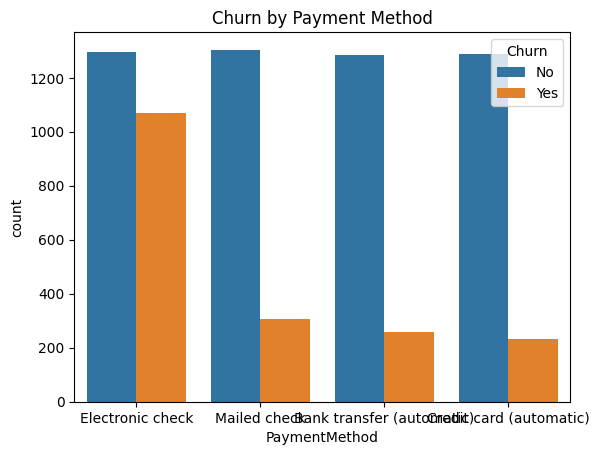

In [7]:
sns.countplot(x = 'PaymentMethod' , hue = 'Churn', data = df)
plt.title("Churn by Payment Method")
plt.show()

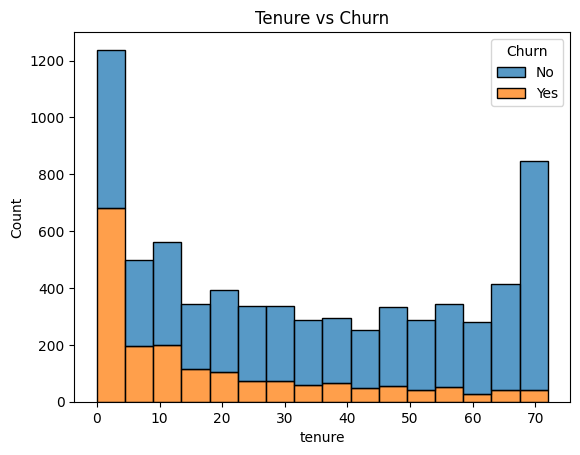

In [8]:
sns.histplot(data = df, x ='tenure' , hue = 'Churn', multiple = 'stack')
plt.title('Tenure vs Churn')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

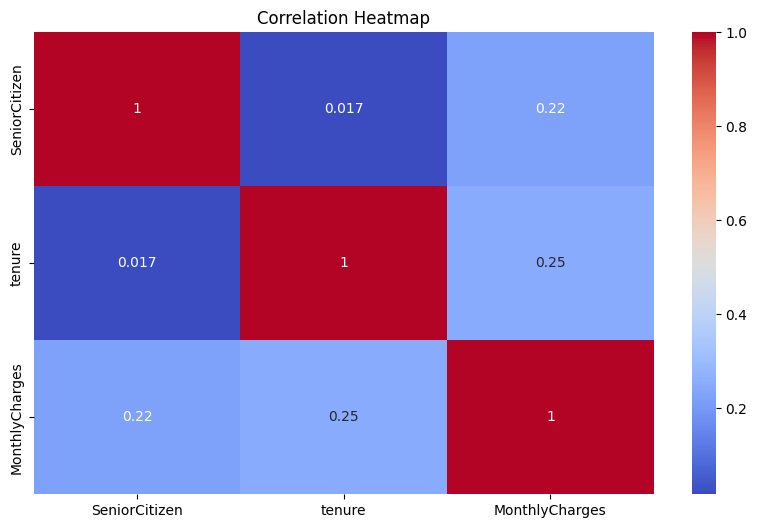

In [9]:
num_df = df.select_dtypes(include = ['int64', 'float64'])
plt.figure(figsize = (10,6))
sns.heatmap(num_df.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [12]:
df.dtypes 


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [14]:
replace_col = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'MultipleLines']
df[replace_col] = df[replace_col].replace({'No internet service' : 'No' , 'No phone service' : 'No'})


In [15]:
binary_col = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
               'Churn'] + replace_col 
df[binary_col] = df[binary_col].applymap(lambda x: 1 if x == 'Yes' else 0)

C:\Users\Ali Muhtasham Javed\AppData\Local\Temp\ipykernel_8824\2134895275.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_col] = df[binary_col].applymap(lambda x: 1 if x == 'Yes' else 0)


In [16]:
multi_categorical = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns = multi_categorical, drop_first = True)
df = df[df['TotalCharges'].notna()]

In [17]:
df.isnull().sum()

customerID                               0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMeth

In [18]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7038,6840-RESVB,Male,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,False,False,True,False,False,False,True
7039,2234-XADUH,Female,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,True,False,True,False,True,False,False
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,False,False,False,False,False,True,False
7041,8361-LTMKD,Male,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,True,False,False,False,False,False,True
7042,3186-AJIEK,Male,0,0,0,66,1,0,1,0,1,1,1,1,1,105.65,6844.50,0,True,False,False,True,False,False,False


In [19]:
df['Churn'].value_counts(normalize = True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

In [20]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()



,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [21]:
df['TotalCharges'].unique()


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ],
      shape=(6530,))

```python
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# drop non-numeric columns
X = df.drop(['Churn', 'customerID', 'gender'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['Churn'].dropna())
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Print results
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



#### Model result before improving it

```python 
Accuracy score: 0.8024164889836531

Confusion Matrix:
[[915 118]
 [160 214]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

C:\Users\Ali Muhtasham Javed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 800 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=800).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

In [22]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# drop non-numeric columns
X = df.drop(['Churn', 'customerID', 'gender'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['Churn'].dropna())
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Print results
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy score: 0.8038379530916845

Confusion Matrix:
[[917 116]
 [160 214]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [25]:
from sklearn.metrics import roc_auc_score, roc_curve
y_probs = model.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test , y_probs) 
print("Roc auc score", auc)


Roc auc score 0.8354929052497527


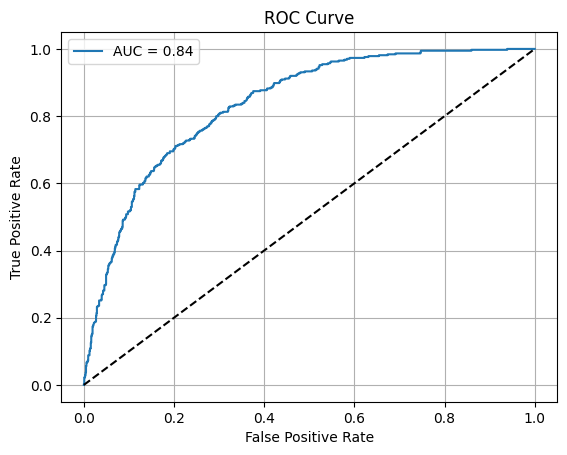

In [26]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label = f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
coefs = pd.DataFrame({'Feature' : X_train.columns,
                    'Coefficient' : model.coef_[0]}).sort_values(by = 'Coefficient', ascending=False)
print("Top Positive Influences on Churn:")
print(coefs.head(10))

print("\nTop Negative Influences on Churn:")
print(coefs.tail(10))

Top Positive Influences on Churn:
                           Feature  Coefficient
15     InternetService_Fiber optic     0.691000
14                    TotalCharges     0.619828
10                     StreamingTV     0.235427
11                 StreamingMovies     0.222320
5                    MultipleLines     0.206793
20  PaymentMethod_Electronic check     0.182429
12                PaperlessBilling     0.143377
0                    SeniorCitizen     0.071193
8                 DeviceProtection     0.061700
21      PaymentMethod_Mailed check     0.034092

Top Negative Influences on Churn:
               Feature  Coefficient
7         OnlineBackup    -0.036236
4         PhoneService    -0.040998
2           Dependents    -0.105223
9          TechSupport    -0.124845
6       OnlineSecurity    -0.143122
17   Contract_One year    -0.311619
16  InternetService_No    -0.582766
18   Contract_Two year    -0.600598
13      MonthlyCharges    -0.757472
3               tenure    -1.328938
